# Recruit Restaurant Visitor Forecasting

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
air_reserve = pd.read_csv("air_reserve.csv")
air_store_info = pd.read_csv("air_store_info.csv")
air_visit_data = pd.read_csv("air_visit_data.csv")
hpg_reserve = pd.read_csv("hpg_reserve.csv")
hpg_store_info = pd.read_csv("hpg_store_info.csv")
date_info = pd.read_csv("date_info.csv")
store_id_relation = pd.read_csv("store_id_relation.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [3]:
print(air_reserve.shape,'/',air_reserve['air_store_id'].nunique())
print('*' * 50)
print(air_reserve.isnull().any())
air_reserve.head(3)

(92378, 4) / 314
**************************************************
air_store_id        False
visit_datetime      False
reserve_datetime    False
reserve_visitors    False
dtype: bool


,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6


In [136]:
print(air_store_info.shape)
print('*' * 50)
print(air_store_info.isnull().any())
air_store_info.head(3)

(829, 5)
**************************************************
air_store_id      False
air_genre_name    False
air_area_name     False
latitude          False
longitude         False
dtype: bool


,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852


In [4]:
print(air_visit_data.shape ,'/',air_visit_data['air_store_id'].nunique())
print('*' * 50)
print(air_visit_data.isnull().any())
air_visit_data.head()

(252108, 3) / 829
**************************************************
air_store_id    False
visit_date      False
visitors        False
dtype: bool


,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [5]:
print(hpg_reserve.shape, '/', hpg_reserve['hpg_store_id'].nunique())
print('*' * 50)
print(hpg_reserve.isnull().any())
hpg_reserve.head()

(2000320, 4) / 13325
**************************************************
hpg_store_id        False
visit_datetime      False
reserve_datetime    False
reserve_visitors    False
dtype: bool


,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


In [6]:
print(hpg_store_info.shape, '/', hpg_store_info['hpg_store_id'].nunique())
print('*' * 50)
print(hpg_store_info.isnull().any())
hpg_store_info.head()

(4690, 5) / 4690
**************************************************
hpg_store_id      False
hpg_genre_name    False
hpg_area_name     False
latitude          False
longitude         False
dtype: bool


,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


In [7]:
print(date_info.shape)
date_info.head()

(517, 3)


,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [8]:
print(store_id_relation.shape)
store_id_relation.head()

(150, 2)


,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


## AirREGI / Restaurant Board (air): a reservation control and cash register system
### Air 데이터 Set 3개 
#### air_reserve : Air Store별 방문날짜, 예약날짜, 예약수 / 행,열(92,378 / 4) / Unique Store(314) / 결측치 X
#### air_store_info : Air Store정보 데이터 Set(음식종류, 가게명, 위도, 경도) / 행,열(829 / 4) / 결측치 X
#### air_visit_data :  Air Store 일자별 방문자수 / 행,열(252,108 / 3) / Unique Store(829) / 결측치 X

## Hot Pepper Gourmet(hpg): users can search restaurants, make a reservation online
### hpg 데이터 Set 2개
#### hpg_reserve : hpg Store별 방문날짜, 예약날짜, 예약수 / 행,열(2,000,320 / 4) / Uniqud Store(13,325) / 결측치 X
#### hpg_store_info : hpg Store정보 데이터 Set(음식종류, 가게명, 위도, 경도) / 행,열(4,690 / 5) / 결측치 X

## date_info : 날짜 정보(공휴일)

## Air - hpg 정보

Portion of reservation : 0.08373646263558526


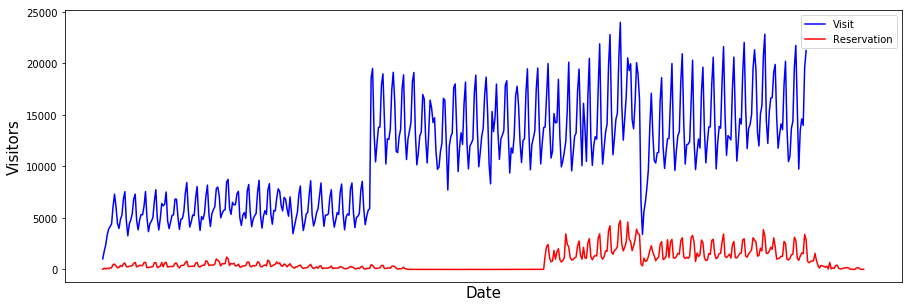

In [135]:
# 2016.1.1 ~ 2017.4.22 : 방문자
# 2016.1.1 ~ 2017.5.31 : 예약자
ex1 = air_visit_data.groupby('visit_date')['visitors'].sum().reset_index()

air_reserve['visit_date'] = air_reserve['visit_datetime'].str.slice(0,10)
ex2 = air_reserve.groupby('visit_date')['reserve_visitors'].sum().reset_index()

plt.figure(figsize=(15,5))
plt.plot(ex1['visit_date'], ex1['visitors'], color = 'b', label='Visit')
plt.plot(ex2['visit_date'], ex2['reserve_visitors'], color='r', label='Reservation')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Visitors', fontsize=15)
plt.legend(loc="best")
plt.xticks([]);

a1 = ex2['reserve_visitors']/ex1['visitors']
a1 = a1.dropna(axis=0)
print('Portion of reservation :',a1.mean())

##### 1. 예약으로 방문하는 고객수가 상대적으로 적음, 전체 고객 중 평균 8% 정도 차지
##### 2. 특정 구간에 따라 방문자수가 증가하고 하락하는 추세를 보임 (주말에 따른 영향??)
##### 3. 특정일 이후에 2배가까이 방문자수가 급증함 (신규 Store??)

In [76]:
AIR_visit = pd.merge(air_visit_data, air_store_info, on='air_store_id', how='outer')
AIR_visit = pd.merge(AIR_visit, date_info, left_on='visit_date', right_on='calendar_date', how='inner')
print(AIR_visit.shape)

AIR_visit['visit_MM'] = AIR_visit['visit_date'].str.slice(0,7)
ex1 = AIR_visit.groupby(['visit_MM','visit_date','holiday_flg'])['visitors'].sum().reset_index()
ex2 = AIR_visit.groupby(['visit_MM','visit_date','holiday_flg'])['visitors'].mean().reset_index()

(252108, 10)


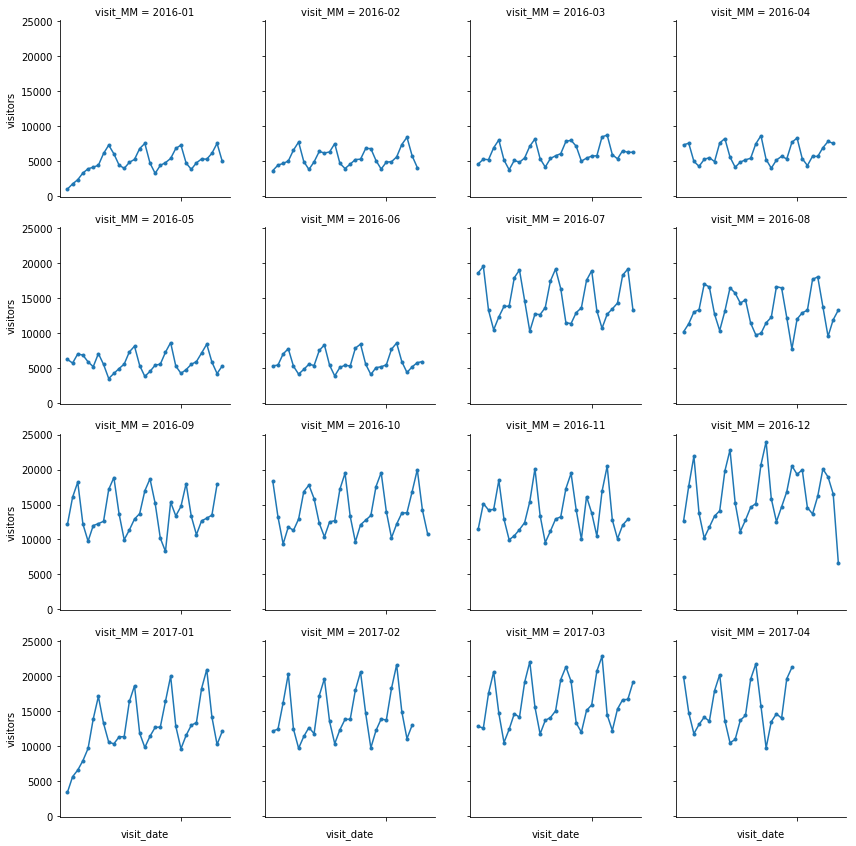

In [74]:
G1 = sns.FacetGrid(ex1, col="visit_MM", col_wrap=4)
G1 = G1.map(plt.plot, "visit_date","visitors", marker='.')
G1 = G1.set(xticks=[''])

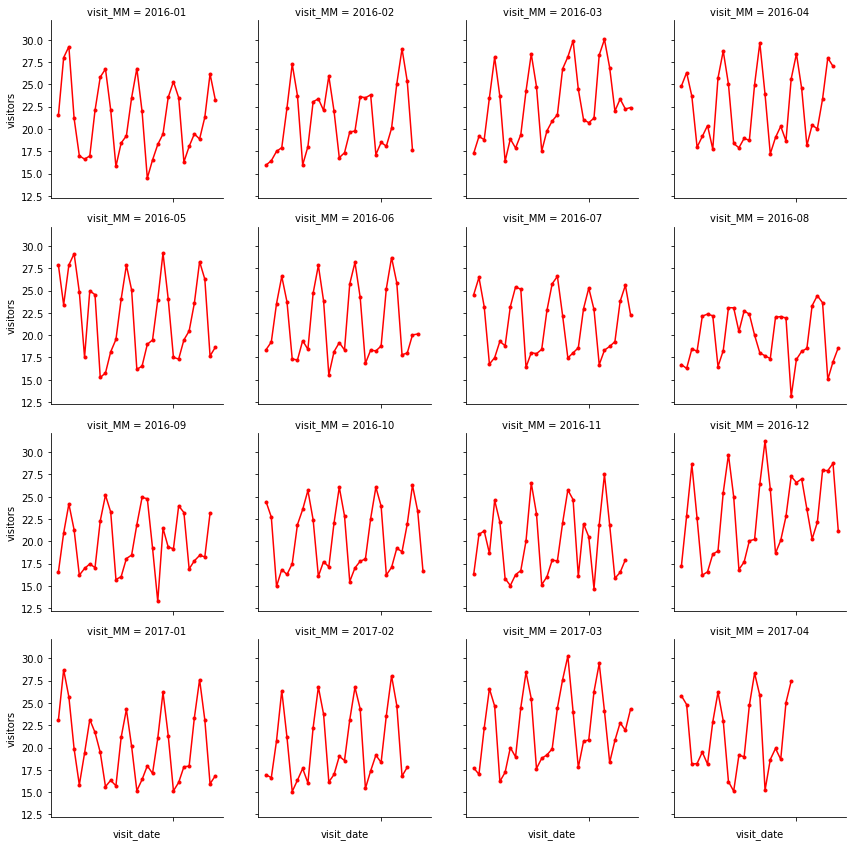

In [77]:
G2 = sns.FacetGrid(ex2, col="visit_MM", col_wrap=4)
G2 = G2.map(plt.plot, "visit_date","visitors", marker='.', color='red')
G2 = G2.set(xticks=[''])

Text(0,0.5,'')

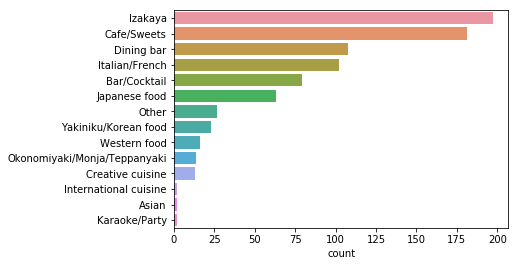

In [157]:
fig = sns.countplot(y='air_genre_name', data=air_store_info, order=air_store_info['air_genre_name'].value_counts().index)
fig.set_ylabel('')